# Stock Market Price prediction

In [1]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


## Downloading stock price data

In [2]:
import yfinance as yf

In [3]:
ticker= yf.Ticker("AAPL")

In [4]:
name= ticker.info["shortName"]
name

'Apple Inc.'

In [5]:
df= ticker.history(period= "10y")
#set period of data collected

In [6]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-06-23 00:00:00-04:00,28.551294,28.580409,28.416913,28.450508,121075600,0.0,0.0
2015-06-24 00:00:00-04:00,28.490822,29.070897,28.470666,28.692392,221123600,0.0,0.0
2015-06-25 00:00:00-04:00,28.860366,28.936514,28.555771,28.555771,127752400,0.0,0.0
2015-06-26 00:00:00-04:00,28.593838,28.665507,28.334037,28.387789,176267200,0.0,0.0
2015-06-29 00:00:00-04:00,28.098880,28.325087,27.879393,27.890591,196645600,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-16 00:00:00-04:00,197.300003,198.690002,196.559998,198.419998,43020700,0.0,0.0
2025-06-17 00:00:00-04:00,197.199997,198.389999,195.210007,195.639999,38856200,0.0,0.0
2025-06-18 00:00:00-04:00,195.940002,197.570007,195.070007,196.580002,45394700,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [7]:
df=df.tz_convert("africa/harare")

Checking Correlation

In [8]:
df.corr()["Close"].sort_values(ascending=False)

Close           1.000000
High            0.999837
Low             0.999830
Open            0.999643
Dividends       0.024898
Stock Splits    0.006603
Volume         -0.538042
Name: Close, dtype: float64

In [9]:
del df["Dividends"]
del df["Stock Splits"]

In [10]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-06-23 06:00:00+02:00,28.551294,28.580409,28.416913,28.450508,121075600
2015-06-24 06:00:00+02:00,28.490822,29.070897,28.470666,28.692392,221123600
2015-06-25 06:00:00+02:00,28.860366,28.936514,28.555771,28.555771,127752400
2015-06-26 06:00:00+02:00,28.593838,28.665507,28.334037,28.387789,176267200
2015-06-29 06:00:00+02:00,28.098880,28.325087,27.879393,27.890591,196645600
...,...,...,...,...,...
2025-06-16 06:00:00+02:00,197.300003,198.690002,196.559998,198.419998,43020700
2025-06-17 06:00:00+02:00,197.199997,198.389999,195.210007,195.639999,38856200
2025-06-18 06:00:00+02:00,195.940002,197.570007,195.070007,196.580002,45394700


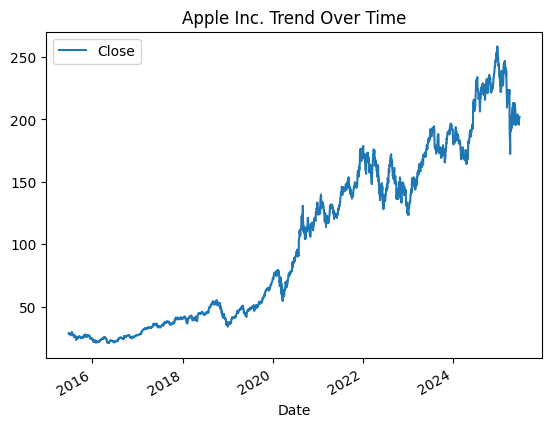

In [11]:
chart= df.plot.line(y="Close", title= (f"{name} Trend Over Time"), use_index=True);


## Setting up Prediction.

In [12]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [13]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [14]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2015-06-23 06:00:00+02:00,28.551294,28.580409,28.416913,28.450508,121075600,28.692392,1
2015-06-24 06:00:00+02:00,28.490822,29.070897,28.470666,28.692392,221123600,28.555771,0
2015-06-25 06:00:00+02:00,28.860366,28.936514,28.555771,28.555771,127752400,28.387789,0
2015-06-26 06:00:00+02:00,28.593838,28.665507,28.334037,28.387789,176267200,27.890591,0
2015-06-29 06:00:00+02:00,28.098880,28.325087,27.879393,27.890591,196645600,28.092159,1
...,...,...,...,...,...,...,...
2025-06-16 06:00:00+02:00,197.300003,198.690002,196.559998,198.419998,43020700,195.639999,0
2025-06-17 06:00:00+02:00,197.199997,198.389999,195.210007,195.639999,38856200,196.580002,1
2025-06-18 06:00:00+02:00,195.940002,197.570007,195.070007,196.580002,45394700,201.000000,1


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [15]:
#instatiate model
model= RandomForestClassifier(random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low", "Open"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(random_state=1)

## Evaluating the model

In [16]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [17]:
preds= pd.DataFrame(preds, index= test.index) # array to dataframe

In [18]:
preds.columns= ["Next Day Prediction"] #name the column

In [19]:
precision_score(test[y], preds)

0.41935483870967744

The precision score shows how accurately the model predicted that the price would go up.

## Results

In [20]:
pred_res= pd.concat([test[y], preds], axis=1)

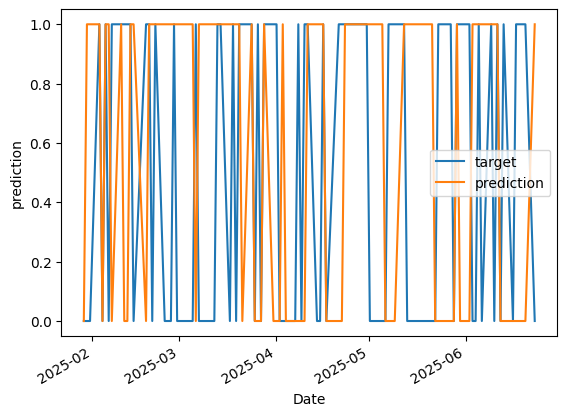

In [21]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

Visual summary of model perfomance

In [22]:
preds.tail()

,Next Day Prediction
Date,
2025-06-16 06:00:00+02:00,0
2025-06-17 06:00:00+02:00,0
2025-06-18 06:00:00+02:00,0
2025-06-20 06:00:00+02:00,0
2025-06-23 06:00:00+02:00,1


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.